In [9]:
# # Colab has two versions of TensorFlow installed: a 1.x version and a 2.x version. 
# # Colab currently uses TF 1.x by default
# # To enable TF2 execute the following code

# %tensorflow_version 2.x
# import tensorflow as tf
# print(tf.__version__)


In [10]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [11]:
# # check to make sure your dat ais at the correct location

# !ls /content/gdrive/'My Drive'/'Deep Learning'/'Assignment 1'/


In [12]:
# !unzip "/content/gdrive/My Drive/Deep Learning/Assignment 1/data-1.zip"

In [13]:
# In this code we load the training and test data

import numpy as np
import h5py

  
def loadData():
    with h5py.File('data.h5','r') as hf:
      print('List of arrays in this file: \n', hf.keys())
      allTrain = hf.get('trainData')
      allTest = hf.get('testData')
      npTrain = np.array(allTrain)
      npTest = np.array(allTest)
        

    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

trainX, trainY, testX, testY = loadData()

print('Shape of the feature training data: \n', trainX.shape)
print('Shape of the feature test data: \n', testX.shape)
print('Shape of the true training class labels: \n', trainY.shape)
print('Shape of the true test class labels: \n', testY.shape)


List of arrays in this file: 
 <KeysViewHDF5 ['testData', 'trainData']>
Shape of the feature training data: 
 (200000, 784)
Shape of the feature test data: 
 (17000, 784)
Shape of the true training class labels: 
 (200000,)
Shape of the true test class labels: 
 (17000,)


In [14]:
# import the necessary packages
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers




Compiling model...
Training network...
Train on 180000 samples, validate on 20000 samples
Epoch 1/30
180000/180000 [==============================] - 37s 207us/sample - loss: 0.5289 - accuracy: 0.8414 - val_loss: 0.4303 - val_accuracy: 0.8699
Epoch 2/30
180000/180000 [==============================] - 39s 217us/sample - loss: 0.4420 - accuracy: 0.8673 - val_loss: 0.4071 - val_accuracy: 0.8762
Epoch 3/30
180000/180000 [==============================] - 39s 217us/sample - loss: 0.4084 - accuracy: 0.8764 - val_loss: 0.3824 - val_accuracy: 0.8842
Epoch 4/30
180000/180000 [==============================] - 37s 205us/sample - loss: 0.3919 - accuracy: 0.8817 - val_loss: 0.3768 - val_accuracy: 0.8892
Epoch 5/30
180000/180000 [==============================] - 37s 205us/sample - loss: 0.3792 - accuracy: 0.8853 - val_loss: 0.3778 - val_accuracy: 0.8878
Epoch 6/30
180000/180000 [==============================] - 44s 242us/sample - loss: 0.3654 - accuracy: 0.8883 - val_loss: 0.3700 - val_accuracy:

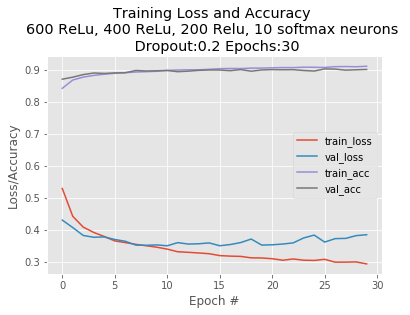

In [17]:

from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
NUM_EPOCHS = 30


# initialize the optimizer and model
print("Compiling model...")


"""Configure the architecture here.."""

#Model with only Softmax Layer - Softmax classifier
# model=tf.keras.models.Sequential([layers.Dense(10, activation=tf.nn.softmax, input_shape= (784,) ) ])

"""Configure the architecture here.."""
# Model with Softmax and ReLu Layers  #L1 200 Neurons   L2 Softmax 
# model=tf.keras.models.Sequential([layers.Dense(300, activation=tf.nn.relu, input_shape= (784,) ) ,
#                                   layers.Dense(10, activation=tf.nn.softmax, input_shape= (784,) ) ])

# Model with Softmax and ReLu Layers  #L1 400 Neurons  L2 200 Neurons   L3 Softmax 
# model=tf.keras.models.Sequential([ layers.Dense(400, activation=tf.nn.relu, input_shape= (784,) ) ,
# 	                                 layers.Dense(200, activation=tf.nn.relu ) ,
#                             			 layers.Dense(10, activation=tf.nn.softmax) 
# 																 ])

# Model with Softmax and ReLu Layers  #L1 600 Neurons  L2 400 Neurons   L3 200 Neurons   L4 Softmax 
# model=tf.keras.models.Sequential([ layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
# 	                               layers.Dense(400, activation=tf.nn.relu ) ,
# 	                               layers.Dense(200, activation=tf.nn.relu ) ,
#                             	   layers.Dense(10, activation=tf.nn.softmax) 
# 																 ])

# Model with Drop out - #L1 600 Neurons  L2 400 Neurons   L3 200 Neurons   L4 Softmax  (with drop out)
model=tf.keras.models.Sequential([ layers.Dense(600, activation=tf.nn.relu, input_shape= (784,)),
                                   layers.Dropout(0.2), 
	                               layers.Dense(400, activation=tf.nn.relu ) ,
							       layers.Dropout(0.2), 
	                               layers.Dense(200, activation=tf.nn.relu ) ,
								   layers.Dropout(0.2), 
                            	   layers.Dense(10, activation=tf.nn.softmax) 
																 ])

# Model with Drop out - #L1 800 Neurons L2 600 Neurons  L3 400 Neurons   L4 200 Neurons   L5 Softmax  (with drop out)
# model=tf.keras.models.Sequential([ layers.Dense(800, activation=tf.nn.relu, input_shape= (784,)),
#                                    layers.Dropout(0.3),
#                                     layers.Dense(600, activation=tf.nn.relu),
#                                    layers.Dropout(0.3),
# 	                                 layers.Dense(400, activation=tf.nn.relu ) ,
# 																	 layers.Dropout(0.3), 
# 	                                 layers.Dense(200, activation=tf.nn.relu ) ,
# 																	 layers.Dropout(0.3), 
#                             			 layers.Dense(10, activation=tf.nn.softmax) 
# 																 ])


""" Passing the model to an optimizer """

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


"""train the network"""
print("Training network...")
history     = model.fit(trainX, trainY, validation_split=0.1, epochs=NUM_EPOCHS)
resultsProb = model.predict(testX)

"""calculate predicted results from probabilities (horizontal axis) """
results = np.argmax(resultsProb, axis =1)
print(confusion_matrix(testY, results))


"""Plotting The Performance"""

# configuration = 'Basic with 10 softmax neurons'
# configuration = '200 Relu, 10 softmax neurons'
# configuration = '400 ReLu, 200 Relu, 10 softmax neurons'
# configuration = '600 ReLu, 400 ReLu, 200 Relu, 10 softmax neurons'
# configuration = '800 ReLu, 600 ReLu, 400 ReLu, 200 Relu, 10 softmax neurons'

# configuration = '600 ReLu, 0.3D, 400 ReLu, 0.2D, 200 Relu \n 0.1D, 10 softmax neurons'
configuration = '600 ReLu, 400 ReLu, 200 Relu, 10 softmax neurons \n Dropout:0.2'


plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_loss"], label="val_loss") 
plt.plot(np.arange(0, NUM_EPOCHS), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_accuracy"], label="val_acc") 
plt.title("Training Loss and Accuracy \n"+configuration+' Epochs:'+str (NUM_EPOCHS)) 
plt.xlabel("Epoch #") 
plt.ylabel("Loss/Accuracy")
plt.legend()